In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('mountains_vs_beaches_preferences.csv')

In [3]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [5]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [ ]:
sns.pairplot(df,corner=True,hue='Preference')

<Axes: >

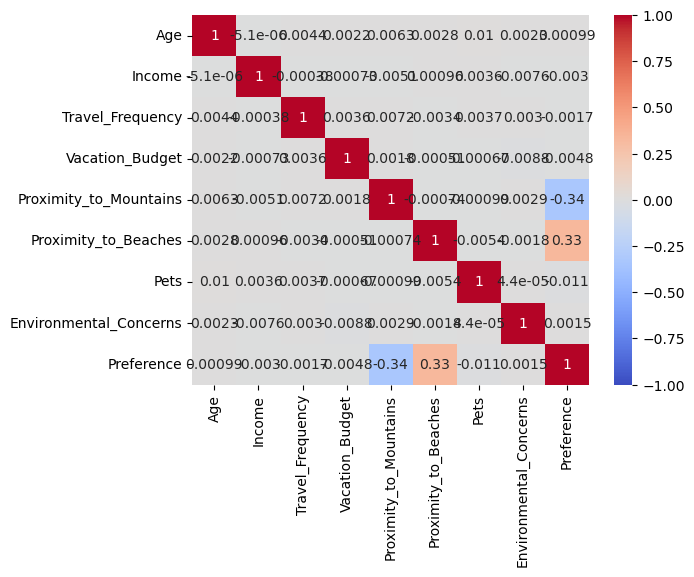

In [6]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [7]:
df=pd.get_dummies(df,columns=['Gender','Education_Level','Preferred_Activities','Location','Favorite_Season'],dtype=int,drop_first=True)

In [8]:
df.isnull().sum()

Age                                0
Income                             0
Travel_Frequency                   0
Vacation_Budget                    0
Proximity_to_Mountains             0
Proximity_to_Beaches               0
Pets                               0
Environmental_Concerns             0
Preference                         0
Gender_male                        0
Gender_non-binary                  0
Education_Level_doctorate          0
Education_Level_high school        0
Education_Level_master             0
Preferred_Activities_skiing        0
Preferred_Activities_sunbathing    0
Preferred_Activities_swimming      0
Location_suburban                  0
Location_urban                     0
Favorite_Season_spring             0
Favorite_Season_summer             0
Favorite_Season_winter             0
dtype: int64

In [9]:
X=df.drop('Preference',axis=1)
y=df['Preference']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
#accuracy list 
acc_li=[]
for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_li.append(accuracy_score(y_test,y_pred))

print(acc_li)


In [ ]:
    #error list
    err_li=[]
    for i in range(2,11):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        err_li.append(1-accuracy_score(y_test,y_pred))
    
    print(err_li)

In [13]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      9787
           1       0.47      0.14      0.22      3324

    accuracy                           0.74     13111
   macro avg       0.62      0.54      0.53     13111
weighted avg       0.69      0.74      0.69     13111



In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer

In [16]:
X=df.drop('Preference',axis=1)
y=df['Preference']
#xi-xbar/s
#avg=0
#std dev=1
ss=StandardScaler()

In [17]:
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [20]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11789
           1       0.88      0.69      0.77      3945

    accuracy                           0.90     15734
   macro avg       0.89      0.83      0.85     15734
weighted avg       0.90      0.90      0.89     15734

